In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression ,LogisticRegression, Ridge,Lasso


In [4]:
df=pd.read_csv(r"https://drive.google.com/uc?export=download&id=1Glcioa6hHS9_82ogbKshM3pu9_c9hLzB")
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757


In [5]:
x=df.drop(df[['Median_House_Value']],axis=1)
y=df[['Median_House_Value']]


In [6]:
s=StandardScaler()
x=s.fit_transform(x)

In [7]:
xtrain,xtemp,ytrain,ytemp=train_test_split(x,y,test_size=0.3)
xvid,xtest,yvid,ytest=train_test_split(xtemp,ytemp,test_size=0.5)

In [8]:
l=LinearRegression()
l.fit(xtrain,ytrain)
ypre=l.predict(xtest)


In [9]:
# Initialize models
lin_reg = LinearRegression()
lasso_reg = Lasso(alpha=1.0)
ridge_reg = Ridge(alpha=1.0)

In [10]:
# Train models (Ensure this runs before predictions)
lin_reg.fit(xtrain, ytrain)
lasso_reg.fit(xtrain, ytrain)
ridge_reg.fit(xtrain, ytrain)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e+13, tolerance: 1.922e+10
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [11]:
lasso_model = Lasso(alpha=0.1, max_iter=10000)  # You can adjust the alpha parameter
lasso_model.fit(xtrain, ytrain)

Lasso(alpha=0.1, max_iter=10000)

In [12]:
# Predict on validation set
y_pred_lin_val = lin_reg.predict(xvid)
y_pred_lasso_val = lasso_reg.predict(xvid)  
y_pred_ridge_val = ridge_reg.predict(xvid)
y_pred_lin_test = lin_reg.predict(xtest)
y_pred_lasso_test = lasso_reg.predict(xtest)
y_pred_ridge_test = ridge_reg.predict(xtest)

In [13]:
print("mean squared error is",mean_squared_error(ytest,ypre))
print("mean a absolute is",mean_absolute_error(ytest,ypre))
print("mean a score is",l.score(xtest,ytest))


mean squared error is 4549004762.646256
mean a absolute is 49329.48635785055
mean a score is 0.6612594819214268


In [14]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name, dataset):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} ({dataset} set): MSE = {mse:.2f}, MAE = {mae:.2f}")
    return mse, mae

In [15]:
# Validation set evaluation
mse_lin_val, mae_lin_val = evaluate_model(yvid, y_pred_lin_val, "Linear Regression", "Validation")
mse_lasso_val, mae_lasso_val = evaluate_model(yvid, y_pred_lasso_val, "Lasso Regression", "Validation")
mse_ridge_val, mae_ridge_val = evaluate_model(yvid, y_pred_ridge_val, "Ridge Regression", "Validation")

Linear Regression (Validation set): MSE = 4732457395.02, MAE = 50462.32
Lasso Regression (Validation set): MSE = 4732152143.77, MAE = 50457.57
Ridge Regression (Validation set): MSE = 4732080607.81, MAE = 50457.00


In [16]:
# Test set evaluation
mse_lin_test, mae_lin_test = evaluate_model(ytest, y_pred_lin_test, "Linear Regression", "Test")
mse_lasso_test, mae_lasso_test = evaluate_model(ytest, y_pred_lasso_test, "Lasso Regression", "Test")
mse_ridge_test, mae_ridge_test = evaluate_model(ytest, y_pred_ridge_test, "Ridge Regression", "Test")



Linear Regression (Test set): MSE = 4549004762.65, MAE = 49329.49
Lasso Regression (Test set): MSE = 4549028470.66, MAE = 49329.17
Ridge Regression (Test set): MSE = 4549084279.62, MAE = 49330.72


In [17]:
# Compare results
models = ["Linear", "Lasso", "Ridge"]
mse_scores_val = [mse_lin_val, mse_lasso_val, mse_ridge_val]
mae_scores_val = [mae_lin_val, mae_lasso_val, mae_ridge_val]

mse_scores_test = [mse_lin_test, mse_lasso_test, mse_ridge_test]
mae_scores_test = [mae_lin_test, mae_lasso_test, mae_ridge_test]

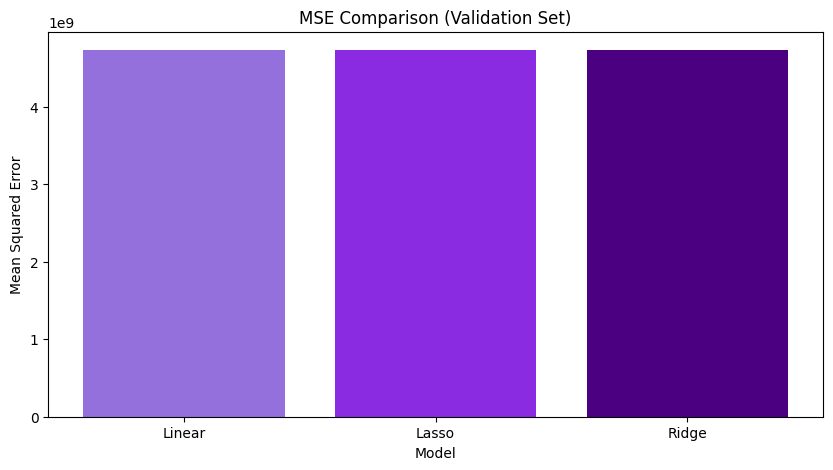

In [21]:

plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores_val, color=['#9370DB', '#8A2BE2', '#4B0082'])  
plt.xlabel('Model')
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison (Validation Set)")
plt.show()

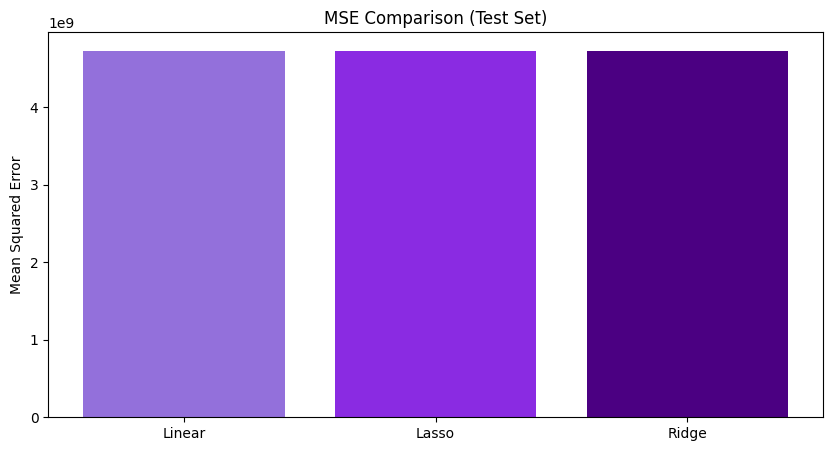

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores_val, color=['#9370DB', '#8A2BE2', '#4B0082'])
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison (Test Set)")
plt.show()


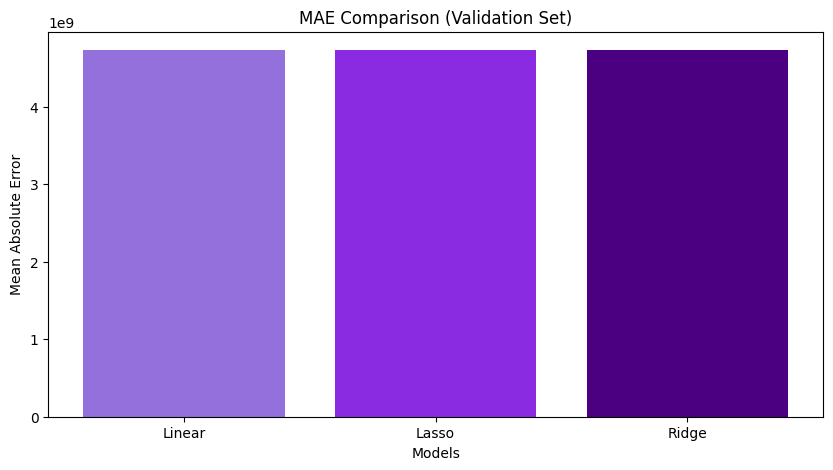

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores_val, color=['#9370DB', '#8A2BE2', '#4B0082'])  
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison (Validation Set)")
plt.show()

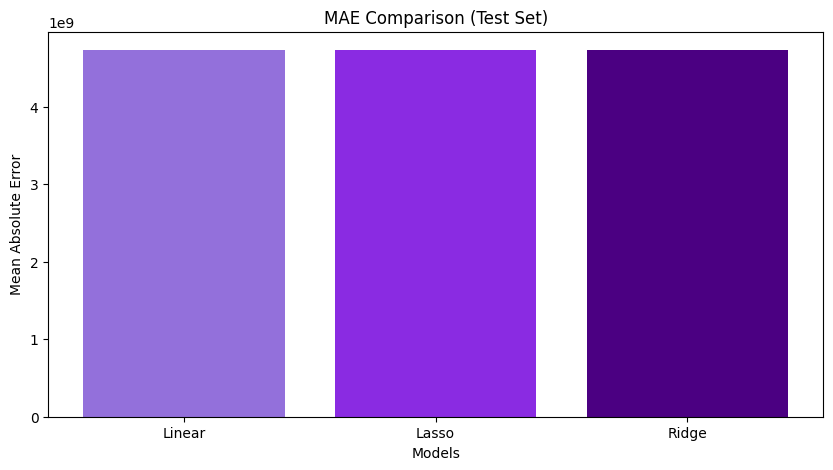

In [24]:

plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores_val, color=['#9370DB', '#8A2BE2', '#4B0082'])  
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison (Test Set)")
plt.show()

score is 0.6428054721048619
mean absolute error 50461.73344117156
mean squared error 4732415952.926837
score is 0.6428085345438583
mean absolute error 50461.1567490884
mean squared error 4732375379.138525
score is 0.6428115323770196
mean absolute error 50460.58687727356
mean squared error 4732335661.30309
score is 0.6428144665210915
mean absolute error 50460.03582458135
mean squared error 4732296787.274712
score is 0.6428173378776023
mean absolute error 50459.497777291916
mean squared error 4732258745.109177
score is 0.6428201473331554
mean absolute error 50458.97864969754
mean squared error 4732221523.060013
score is 0.6428228957597165
mean absolute error 50458.47400579318
mean squared error 4732185109.574678
score is 0.6428255840148933
mean absolute error 50457.9798210099
mean squared error 4732149493.290859
score is 0.6428282129422097
mean absolute error 50457.48984177174
mean squared error 4732114663.032836
best alpha is 0.9
best score is 0.6428282129422097


<Axes: >

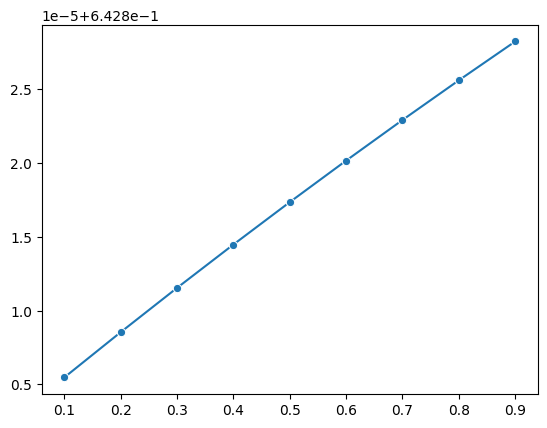

In [27]:
alpha=np.arange(0.1,1,0.1)
acc=[]
bestscore=0
bestalpha=0
for i in alpha:
    ri=Ridge(alpha=i)
    ri.fit(xtrain,ytrain)
    pree=ri.predict(xvid)
    acc.append(ri.score(xvid,yvid))
    if bestscore<ri.score(xvid,yvid):
        bestscore=ri.score(xvid,yvid)
        bestalpha=i
    print("score is",ri.score(xvid,yvid))
    print("mean absolute error",mean_absolute_error(yvid,pree))
    print("mean squared error",mean_squared_error(yvid,pree))
print("best alpha is",bestalpha)
print("best score is",bestscore)
sns.lineplot(x=alpha,y=acc,marker='o')

score is 0.6612543531831977
mean absolute error 49330.58635575023
mean squared error 4549073637.355319


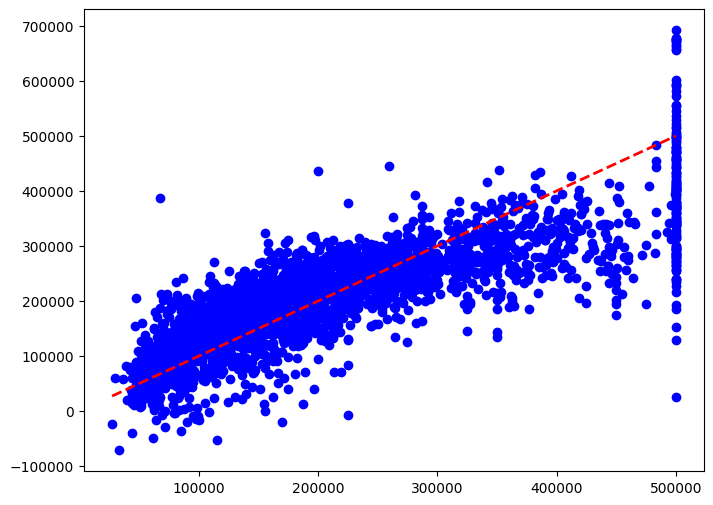

In [ ]:
ri=Ridge(alpha=bestalpha)
ri.fit(xtrain,ytrain)
pree=ri.predict(xtest)
print("score is",ri.score(xtest,ytest))
print("mean absolute error",mean_absolute_error(ytest,pree))
print("mean squared error",mean_squared_error(ytest,pree))
plt.figure(figsize=(8, 6))
plt.scatter(ytest, pree, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(),ytest.max()], 'r--', lw=2)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e+13, tolerance: 1.922e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6428253839614466
mean absolute error 50457.56957923419
mean squared error 4732152143.768537


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.512e+13, tolerance: 1.922e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.6428337037322132
mean absolute error 50456.115665144236
mean squared error 4732041916.391504


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+13, tolerance: 1.922e+10
  model = cd_fast.enet_coordinate_descent(


score is 0.642841810171095
mean absolute error 50454.678420952834
mean squared error 4731934515.416153
score is 0.6428497032780922
mean absolute error 50453.24117676144
mean squared error 4731829940.842483
best alpha is 4
best score is 0.6428497032780922


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.401e+12, tolerance: 1.922e+10
  model = cd_fast.enet_coordinate_descent(


<Axes: >

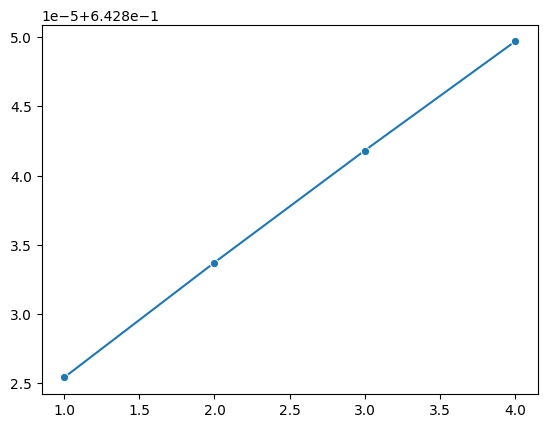

In [ ]:
alpha=np.arange(1,5,1)   #Take big time  alpha=np.arange(1,50,1)  
acc=[]
bestscore=0
bestalpha=0
for i in alpha:
    ri=Lasso(alpha=i)
    ri.fit(xtrain,ytrain)
    pree=ri.predict(xvid)
    acc.append(ri.score(xvid,yvid))
    if bestscore<ri.score(xvid,yvid):
        bestscore=ri.score(xvid,yvid)
        bestalpha=i
    print("score is",ri.score(xvid,yvid))
    print("mean absolute error",mean_absolute_error(yvid,pree))
    print("mean squared error",mean_squared_error(yvid,pree))
print("best alpha is",bestalpha)
print("best score is",bestscore)
sns.lineplot(x=alpha,y=acc,marker='o')